In [1]:
import msprime
import numpy as np
from IPython.display import SVG, display

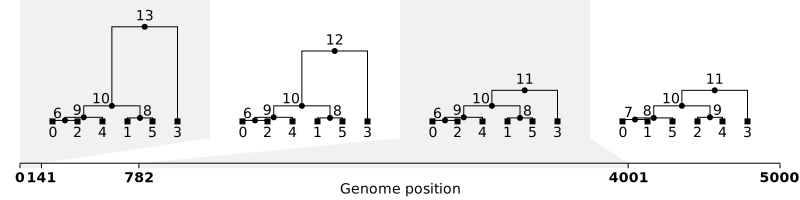

In [2]:
# msprime simulates ancestral histories for a set of sample genomes
# using backward-in-time population genetic models.

# Simulate an ancestral history for 3 diploid samples under the coalescent
# with recombination on a 5kb region with human-like parameters.
ts = msprime.sim_ancestry(
    samples=3,
    recombination_rate=1e-8,
    sequence_length=5_000,
    population_size=10_000,
    random_seed=123456)

# Visualise the simulated ancestral history.
SVG(ts.draw_svg())

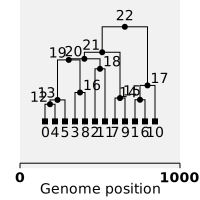

In [3]:
# Including demography example
dem = msprime.Demography()
dem.add_population(name="A", description="Plotted in red.", initial_size=500)
dem.add_population(name="B", description="Plotted in blue.",initial_size=500)
dem.set_migration_rate(source=0, dest=1, rate=0.05)
dem.set_migration_rate(source=1, dest=0, rate=0.02)

# Bottleneck in Population 0 between 50 - 150 generations ago.
dem.add_population_parameters_change(time=50, initial_size=250, population=0)
dem.add_population_parameters_change(time=150, initial_size=500, population=0)

# Exponential growth in Population 1 starting 50 generations ago.
dem.add_population_parameters_change(time=100, growth_rate=0.01, population=1)

# Sort events, since we've added some out of time order.
dem.sort_events()

# Simulate.
ts = msprime.sim_ancestry(samples={"A" : 3, "B" : 3}, demography=dem, sequence_length=1000, random_seed=63461, recombination_rate=1e-7)
SVG(ts.draw_svg())

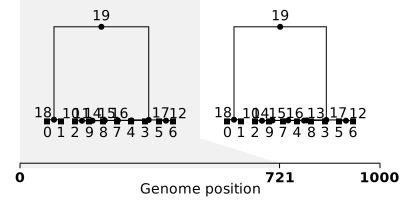

In [4]:
# Try a one population two-epoch model: instantaneous size change some time
# ago in the past
dem = msprime.Demography()
dem.add_population(initial_size=500)

# Bottleneck in Pop at T=0.475 => 0.475*4*Na = 950 gen ago. 
# (instantaneous); nu=0.5
# dem.add_population_parameters_change(time=950, initial_size=500)

# Instantaneous growth in Pop at T=0.475
# nu=5
dem.add_population_parameters_change(time=950, initial_size=2500)

# Simulate.
ts = msprime.sim_ancestry(samples=10, ploidy=1, demography=dem, sequence_length=1000, random_seed=1, recombination_rate=1e-8)

SVG(ts.draw_svg())

In [5]:
msprime.DemographyDebugger(demography=dem)

,start,end,growth_rate
pop_0,500.0,500.0,0
time,type,parameters,effect
950,Population parameter change,"population=-1, initial_size=2500",initial_size → 2.5e+03 for all populations
,start,end,growth_rate
pop_0,2500.0,2500.0,0


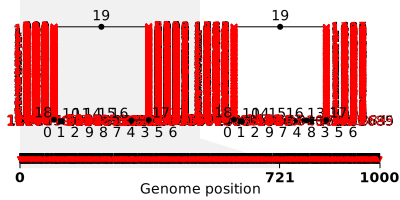

In [7]:
# Adding mutation to produce genetic variation data
mts = msprime.sim_mutations(ts, rate=0.0001, discrete_genome=False)
SVG(mts.draw_svg())

In [8]:
afs = mts.allele_frequency_spectrum(polarised=True, span_normalise=False)
afs

array([  0., 102., 903.,   1.,   2.,   0.,   5.,   0., 929.,   0.,   0.])

In [ ]:
# n_dip_indv = int(mts.num_samples / 2)
# n_dip_indv
# indv_names = [f"tsk_{str(i)}indv" for i in range(n_dip_indv)]
# indv_names
# with open("output.vcf", "w") as vcf_file:
#     mts.write_vcf(vcf_file, individual_names=indv_names)

In [ ]:
with open("output.vcf", "w") as vcf_file:
    mts.write_vcf(vcf_file)

In [ ]:
import dadi
# Parse the VCF file to generate a data dictionary
datafile = 'output.vcf'
dd = dadi.Misc.make_data_dict_vcf(datafile, 'vcf.txt')
dd

In [ ]:
pop_ids, ns = ['POP1'], [4]
fs = dadi.Spectrum.from_data_dict(dd, pop_ids, ns, polarized=False)
fs

In [ ]:
fs = dadi.Spectrum(afs)
fs

In [ ]:
dadi.Plotting.plot_1d_fs(fs)